<a href="https://colab.research.google.com/github/dtabuena/Data_Explore/blob/main/CA1%20Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install openpyxl
!pip install XlsxWriter
!pip install pingouin
from IPython.display import clear_output
import pandas as pd
import os
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

clear_output()

In [44]:
link = 'https://www.dropbox.com/sh/5jheuv2n7pmfzw9/AABpo1PU8v33CR3CCxq3459ba?dl=0'
xl_to_analyze = 'CA1 main parameters.xlsx'

my_drop_folder = 'my_drop_folder'
zipped_file_path = "/content/"+my_drop_folder + ".zip"
unzipped_file_path = "/content/"+my_drop_folder
if not( os.path.exists(zipped_file_path)):
    !wget -O $zipped_file_path $link    # download with new name
!echo A | unzip $zipped_file_path -d $unzipped_file_path 
print(unzipped_file_path)
my_df_dict  = pd.read_excel('my_drop_folder/'+xl_to_analyze, engine='openpyxl',index_col=None,sheet_name=None)
for k in my_df_dict.keys():
    print(k)


Archive:  /content/my_drop_folder.zip
mapname:  conversion of  failed
replace /content/my_drop_folder/CA1 main parameters.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename:  extracting: /content/my_drop_folder/CA1 main parameters.xlsx  
 extracting: /content/my_drop_folder/CA3 parameters for PCA.xlsx  
 extracting: /content/my_drop_folder/DG Type I GC main parameters.xlsx  
 extracting: /content/my_drop_folder/DG Type II GC main parameters.xlsx  
/content/my_drop_folder
E3 9mo
E4 9mo
E3 19mo
E4 19mo


In [45]:
for k in my_df_dict.keys():
    df = my_df_dict[k]
    df['type'] = k
df_list = [my_df_dict[k] for k in my_df_dict.keys()]
full_df = pd.concat(df_list,ignore_index=True)
display(full_df)

,Cm,Rin,RMP,I-F Gain,Rheobase,Spike Latency,Max Firing rate,AP threshold,fAHP(1),sAHP,AP width,AP amp,Adaptation Ratio,AP rise time,type
0,122.03,NaN,-60.9,0.200,76,111.574,32,-51.7800,2.709974,5.441280,0.977561,91.550636,2.240741,0.583862,E3 9mo
1,127.89,NaN,-68.8,0.235,100,388.748,38,-42.8800,8.222517,1.078570,0.836384,88.451035,1.444043,0.497440,E3 9mo
2,152.05,116.07449,-80.6,0.265,160,339.536,37,-37.6400,6.811199,2.478710,0.834140,88.941429,1.557339,0.560136,E3 9mo
3,209.89,100.27355,-70.0,0.250,130,310.037,39,-47.8400,5.926112,0.725265,0.822309,90.355736,1.492063,0.561105,E3 9mo
4,130.23,140.79521,-68.4,0.210,80,191.560,33,-49.3528,6.946742,0.785182,0.842631,93.572777,3.257281,0.487156,E3 9mo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,92.62,147.53600,-62.1,0.280,76,186.718,44,-48.7100,8.446039,1.602100,0.808661,96.744637,2.193237,0.531282,E4 19mo
102,123.04,155.98213,-73.2,0.230,100,241.051,35,-47.3556,8.961277,2.598910,0.836483,94.108559,2.481132,0.570235,E4 19mo
103,170.47,132.57884,-71.5,0.250,76,196.716,41,-48.7956,5.824894,1.727710,0.799807,93.015602,5.131579,0.496740,E4 19mo
104,163.48,114.00848,-68.7,0.265,110,247.052,44,-48.0644,4.921176,2.341840,0.774576,99.700157,4.095745,0.424790,E4 19mo


In [46]:
for r in full_df.index:
    if full_df.loc[r,'AP amp'] <60:
        full_df.at[r,'AP amp'] = np.nan

In [47]:
labeling = ['Cell','type','extra'] # non numerical data 
numericals = [c for c in full_df.columns if c not in labeling ]

full_df_norm = full_df.copy()
mean_dict = {}
sd_dict = {}

for c in full_df_norm.columns:
    if c not in labeling:
        col_mean = np.mean(full_df_norm[c])
        col_sd = np.std(full_df_norm[c])
        mean_dict[c] = col_mean
        sd_dict[c] = col_sd
        full_df_norm[c] = (full_df_norm[c] - col_mean)/col_sd


null_check = pd.isna(full_df_norm)
incomplete =[]
for r in full_df_norm.index:
    vals = np.array(null_check.loc[r,numericals])
    bad = any(vals)
    if bad:
        incomplete.append(r)
# print(incomplete)

complete = [c for c in  full_df_norm.index if c not in incomplete]
full_df_no_null = full_df_norm.loc[complete].copy()
display(full_df_no_null.head())



data_X = full_df_no_null[numericals].to_numpy()
data_X.shape
# pca = PCA(n_components=min(data_X.shape))
# data_X_enc = pca.fit_transform(data_X)
# plt.plot(1-np.cumsum(pca.explained_variance_ratio_))
# pca = PCA(n_components=5)
# data_X_enc = pca.fit_transform(data_X)
# print(data_X_enc.shape)
# print('Var exp:' ,sum(pca.explained_variance_ratio_))
# data_X_reduced = pca.inverse_transform(data_X_enc)

data_for_fit = data_X

,Cm,Rin,RMP,I-F Gain,Rheobase,Spike Latency,Max Firing rate,AP threshold,fAHP(1),sAHP,AP width,AP amp,Adaptation Ratio,AP rise time,type
2,0.193032,-0.624142,-3.297587,0.108604,1.750713,1.172648,-0.437833,2.918374,0.264706,0.344631,-0.050790,-0.637267,-0.547897,0.077749,E3 9mo
3,1.842883,-1.234895,-0.799108,-0.136333,0.800992,0.786463,-0.220454,-0.159311,-0.155593,-1.520530,-0.152601,-0.407245,-0.572560,0.081859,E3 9mo
4,-0.429370,0.331387,-0.421980,-0.789501,-0.781878,-0.764573,-0.872589,-0.615774,0.329070,-1.456796,0.022276,0.115972,0.094405,-0.231777,E3 9mo
5,0.015896,-1.480765,0.709407,-0.381271,1.434139,1.173787,-0.763900,0.490865,0.671795,0.486424,-1.064641,0.497253,-0.671882,-0.207963,E3 9mo
6,-1.015546,1.012999,-1.176237,-0.381271,-1.098452,-0.968224,0.540370,-0.921008,-1.169175,-0.293809,0.591537,-0.300220,0.365664,-0.023916,E3 9mo


In [48]:


type_list = list(full_df_no_null['type'])
uniq_types = list(set(type_list))
uniq_types.sort()
print(uniq_types)
num_t = len(uniq_types)
type_num = [ uniq_types.index(t) for t in type_list]

colors = plt.cm.viridis(np.linspace(0,1,num_t))
alpha = .4
colors = [[0, 0, 0, 1], [0, 0, 0, alpha],
          [1, 0, 1, 1], [1, 0, 1, alpha], 
          [0, .8, .8, 1], [0, .8, .8, alpha]]

list_colors = [colors[i] for i in type_num ]

fig_opt = {'dpi': 300, 'format':'png','bbox_inches':'tight'}

['E3 19mo', 'E3 9mo', 'E4 19mo', 'E4 9mo']


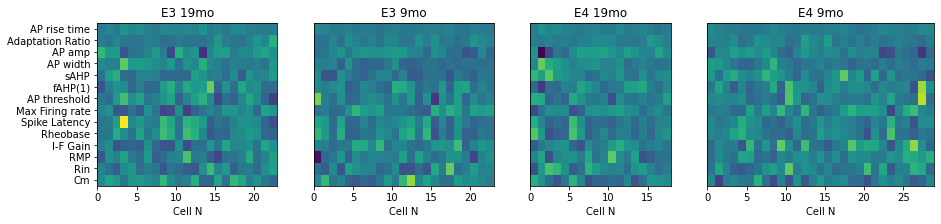

In [49]:
### raw_data_map 
counts = [np.sum( [tt==t for tt in type_list]) for t in uniq_types ]
fig, ax = plt.subplots(1,num_t,figsize = [15,3],gridspec_kw={'width_ratios': counts})


data_X_min = np.min(data_for_fit)
data_X_max = np.max(data_for_fit)

for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]

    ax[ti].pcolor(data_for_fit.T[:,is_type], vmin=data_X_min, vmax=data_X_max)
    ax[ti].set_yticks(np.arange(len(numericals))+0.5)
    if ti ==0 : ax[ti].set_yticklabels(numericals,rotation=0)
    else:  ax[ti].get_yaxis().set_visible(False)
    ax[ti].set_xlabel('Cell N')
    ax[ti].title.set_text(t)
    # plt.clim(data_X_min,data_X_max) 


    start = min(is_type)+3 / len(is_type)
    stop = max(is_type)-3 / len(is_type)

    # ax[ti].plot([start, stop], [0.1, 0.1,], transform=ax[ti].transAxes,color = 'k')

plt.show()
fig.savefig('Normalized_Vals_split.'+fig_opt['format'],**fig_opt)

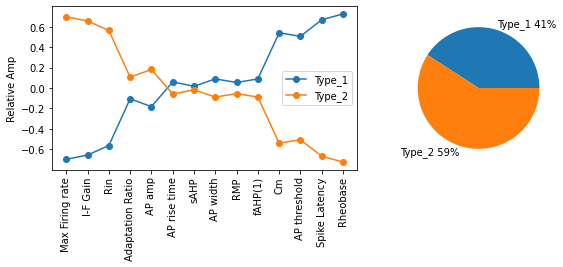

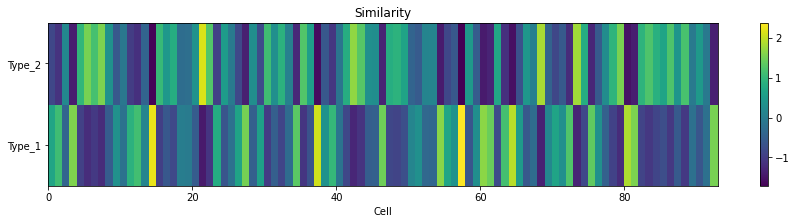

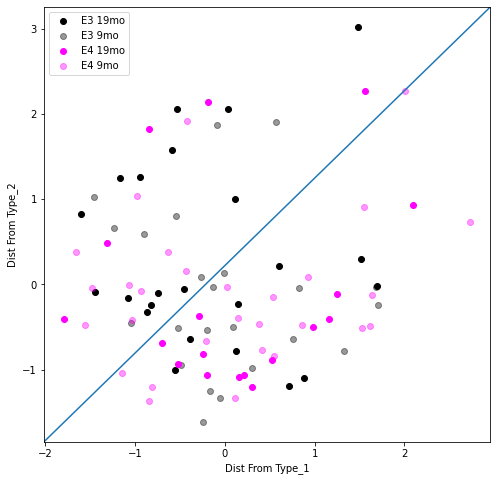

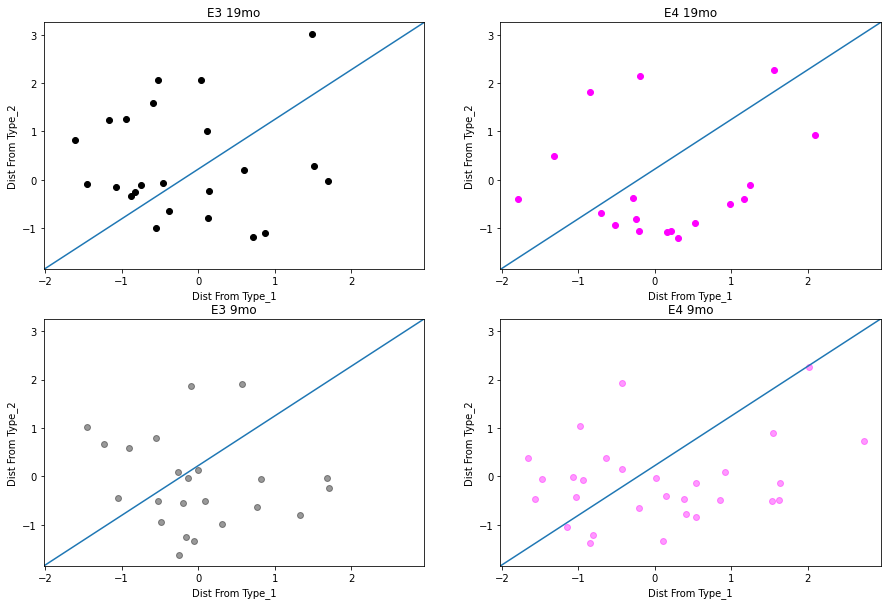

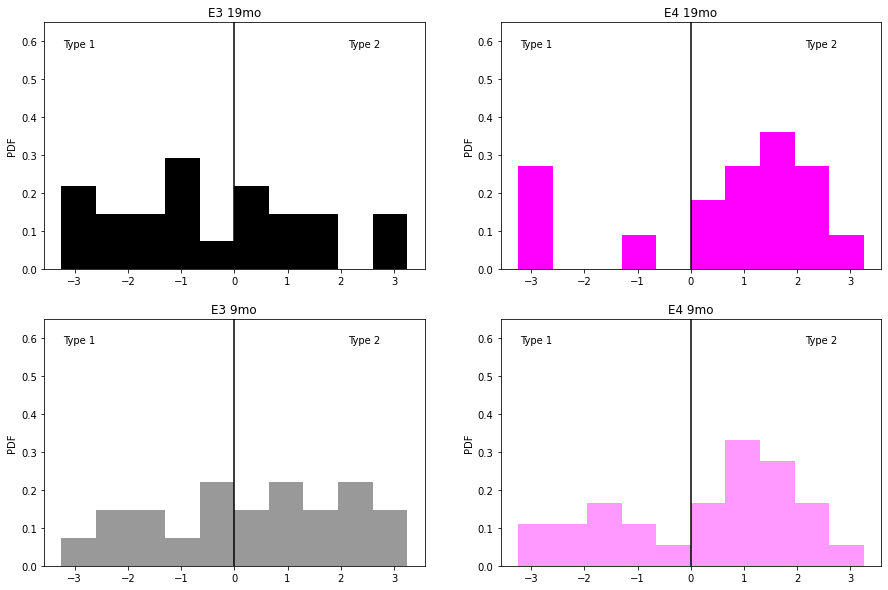

In [50]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=42).fit(data_for_fit)
centers = kmeans.cluster_centers_.T
distances = kmeans.transform(data_for_fit)

rel_centers = (centers.T - np.mean(centers.T,axis = 0)).T

new_cent_order = np.argsort(centers[:,0]).tolist()
fig, ax = plt.subplots(1,2,figsize = [9,3], gridspec_kw={'width_ratios': [2, 1]} )
ax[0].plot(rel_centers[new_cent_order,:],'-o')
ax[0].legend(['Type_1', 'Type_2'])
sorted_numericals = [numericals[i] for i in new_cent_order]
ax[0].set_xticks(np.arange(len(numericals)))
ax[0].set_xticklabels(sorted_numericals,rotation=90)
ax[0].set_ylabel('Relative Amp')
labels = kmeans.labels_ 
rel_counts = [np.mean( l == labels ) for l in range(2)]
# print(counts)
ax[1].pie( rel_counts, labels=['Type_1 '+str(round(rel_counts[0]*100))+'%', 'Type_2 '+str(round(rel_counts[1]*100))+'%']  )
fig.savefig('Clusters.'+fig_opt['format'],**fig_opt)


total_D = np.tile(np.sum(distances,axis=1),[2,1]).T
closeness = np.log(total_D/distances)
closeness = (closeness - np.mean(closeness,axis=0)) / (np.std(closeness,axis=0))  
distances_norm = (distances - np.mean(distances,axis=0)) / (np.std(distances,axis=0))

fig, ax = plt.subplots(1,figsize = [15,3])
c = ax.pcolor(closeness.T)
ax.set_xlabel('Cell')
ax.set_yticks(np.arange(2)+0.5)
ax.set_yticklabels(['Type_1', 'Type_2'])
ax.title.set_text('Similarity')
fig.colorbar(c, ax=ax)
fig.savefig('Cells_in_Clusters.'+fig_opt['format'],**fig_opt)

fig, ax = plt.subplots(1,figsize = [8,8])
for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]
    ax.scatter(distances_norm[is_type,0],distances_norm[is_type,1],color=t_colr, label=t)
ax.legend()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Dist From Type_1')
ax.set_ylabel('Dist From Type_2')
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
comb_xlim = ax.get_xlim()
comb_ylim = ax.get_ylim()
fig.savefig('GenoType_dist.'+fig_opt['format'],**fig_opt)

#### separate #####
fig, axs = plt.subplots(2,2,figsize = [15,10])
axs = axs.T.flatten()
for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]
    axs[ti].scatter(distances_norm[is_type,0],distances_norm[is_type,1],color=t_colr, label=t)
    axs[ti].set_xlabel('Dist From Type_1')
    axs[ti].set_ylabel('Dist From Type_2')
    axs[ti].plot([0, 1], [0, 1], transform=axs[ti].transAxes)
    axs[ti].title.set_text(t)
    axs[ti].set_xlim(comb_xlim)
    axs[ti].set_ylim(comb_ylim)
fig.savefig('GenoType_dist_Separate.'+fig_opt['format'],**fig_opt)


#### separate #####
fig, axs = plt.subplots(2,2,figsize = [15,10])
axs = axs.T.flatten()
for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]

    score = closeness[:,1] - closeness[:,0]

    axs[ti].hist(score[is_type],10,color=t_colr,histtype='bar',density=True,range=(-3.25,3.25))
    # axs[ti].set_xlabel('Similarity Type_1')
    # axs[ti].set_ylabel('Similarity Type_2')
    # axs[ti].plot([0, 1], [0, 1], transform=axs[ti].transAxes)
    axs[ti].title.set_text(t)
    axs[ti].axvline(0, color='k') # vertical
    axs[ti].set_ylim(0,0.65)
    axs[ti].set_ylabel('PDF')
    axs[ti].text(.8, .9, 'Type 2',transform=axs[ti].transAxes)
    axs[ti].text(.05, .9, 'Type 1',transform=axs[ti].transAxes)
fig.savefig('GenoType_Histos.'+fig_opt['format'],**fig_opt)

                           


In [51]:
is_E3 = ['E3' in t for t in type_list ]
is_9mo = [' 9' in t for t in type_list ]
age_list = [9 if b else 19 for b in is_9mo]
genotype = ['E3' if b else 'E4' for b in is_E3]

e34_genotype = [genotype[i] for i in range(len(not_cree)) if not_cree[i]]
e34_score = [score[i] for i in range(len(not_cree)) if not_cree[i]]
e34_age = [str(age_list[i])+'mo' for i in range(len(not_cree)) if not_cree[i]]
genotype_list_str = [t.replace(' 9mo', '').replace(' 19mo', '') for t in type_list]
age_list_str = [str(a)+'mo' for a in age_list]


df_for_34_2W_anova =  pd.DataFrame({'genotype': genotype_list_str,  'Age': age_list_str,'T1_Score': score})

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import pingouin as pg
ANOVA2_results = pg.anova(dv='T1_Score', between=['genotype', 'Age'], data=df_for_34_2W_anova, detailed=True)
display(ANOVA2_results)
ANOVA2_results.to_csv('2W_results Age-Geno.csv')

df_for_34_2W_anova['combination'] = df_for_34_2W_anova.genotype + " : " + df_for_34_2W_anova.Age
m_comp = pairwise_tukeyhsd(endog=df_for_34_2W_anova['T1_Score'], groups=df_for_34_2W_anova['combination'], alpha=0.05)
tukey_data = pd.DataFrame(data=m_comp._results_table.data[1:], columns = m_comp._results_table.data[0])
tukey_data = tukey_data.sort_values('p-adj',ascending=True)
display(tukey_data)
tukey_data.to_csv('pairwise Age-Genotype.csv')

,Source,SS,DF,MS,F,p-unc,np2
0,genotype,3.419138,1.0,3.419138,0.866689,0.354392,0.009644
1,Age,2.857778,1.0,2.857778,0.724395,0.396990,0.008074
2,genotype * Age,8.428896,1.0,8.428896,2.136572,0.147345,0.023444
3,Residual,351.109984,89.0,3.945056,NaN,NaN,NaN


,group1,group2,meandiff,p-adj,lower,upper,reject
1,E3 : 19mo,E4 : 19mo,1.0696,0.3240,-0.5669,2.7062,False
0,E3 : 19mo,E3 : 9mo,0.9556,0.3664,-0.5779,2.4891,False
2,E3 : 19mo,E4 : 9mo,0.8038,0.4723,-0.6482,2.2559,False
5,E4 : 19mo,E4 : 9mo,-0.2658,0.9702,-1.8262,1.2947,False
4,E3 : 9mo,E4 : 9mo,-0.1518,0.9928,-1.6038,1.3002,False
3,E3 : 9mo,E4 : 19mo,0.1140,0.9978,-1.5226,1.7505,False


100%|██████████| 1000/1000 [00:51<00:00, 19.60it/s]


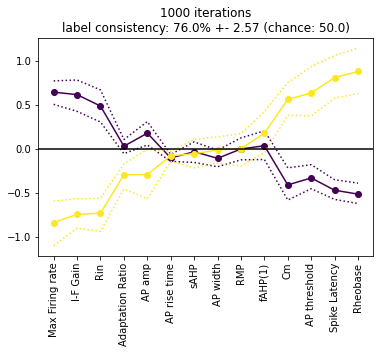

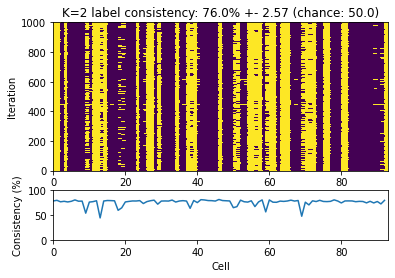

In [52]:
from pandas.compat.numpy import np_array_datetime64_compat
###########   Cluster Validation #############
from random import sample
from tqdm import tqdm
import scipy
''' random sub sample cluster and plot cluster center similarity '''
SubSampleFrac = .8
num_iter = 1000
center_list = []
label_list = []
sub_sample_ind_list = []
full_label_list = []
k = 2


for ni in tqdm( range(num_iter) ):
    sub_sample_ind = []
    for t in uniq_types:
        t_inds = [i for i in range(len(type_list)) if t in type_list[i]]
        # print(t_inds)
        sub_sample_ind.extend( sample(t_inds, int(len(t_inds)*SubSampleFrac) ) )
    kmeans_iter = KMeans(n_clusters=k, random_state=42).fit(data_for_fit[sub_sample_ind][:,new_cent_order])
    centers_iter = kmeans_iter.cluster_centers_.T
    centers_iter = centers_iter - np.mean(centers_iter,axis=0)
    labels_iter = kmeans_iter.labels_

    # if ni>0:
    #     corco = np.corrcoef(centers_iter.T,center_list[0].T)
    #     if corco[0,-1] > corco[0,-2]:
    #         centers_iter = np.flip(centers_iter, axis=1)
    #         labels_iter=np.logical_not(labels_iter)
    if ni>0:
        corco = np.corrcoef(centers_iter.T,center_list[0].T)
        corco = corco[0:k,k:]
        ind = np.argmax(corco,axis=0) 
        centers_iter = centers_iter[:,ind]
        labels_iter = [ind[l] for l in labels_iter]
    
    full_label_iter = np.empty((data_for_fit.shape[0],))
    full_label_iter[:] = np.nan
    full_label_iter[sub_sample_ind] = labels_iter

    center_list.append(centers_iter)
    label_list.append(labels_iter)
    sub_sample_ind_list.append(sub_sample_ind_list)
    full_label_list.append(full_label_iter)
    
    # delta_centers_iter = abs( np.diff(centers_iter,axis=1))
   
center_stack = np.stack(center_list)
mean_center = np.mean(center_stack,0)
nintey_p_center = np.percentile(center_stack, [2.5, 97.5], axis=0)

cmap = plt.cm.viridis(np.linspace(0,1,k))
fig, ax = plt.subplots(1)
for ki in range(k):
    ax.plot(mean_center[:,ki].T,'-o',color=cmap[ki])
    ax.plot(nintey_p_center[0,:,ki].T,':',color=cmap[ki])
    ax.plot(nintey_p_center[1,:,ki].T,':',color=cmap[ki])


ax.set_xticks(np.arange(len(numericals)))
ax.set_xticklabels(sorted_numericals,rotation=90)
ax.axhline(0, color='k')



full_label_stack = np.stack(full_label_list)

pseudo_truth = scipy.stats.mode(full_label_stack,axis=0)[0]
is_match = full_label_stack == pseudo_truth
consistency_iter = np.mean(is_match, axis = 1)
mean_consistency = np.mean(consistency_iter)
std_consistency = np.std(consistency_iter)
consistency_report = 'label consistency: ' + str(round(mean_consistency*100,1)) + '% +- ' + str(round(std_consistency*100,2)) + ' (chance: ' + str(round(1/k*100,1))+')'
# print(consistency_report)
# print('(chance: ' + str(round(1/k*100,1))+')')
ax.title.set_text( str(ni+1) +' iterations' + '\n' + consistency_report)
plt.show()
fig.savefig('CrossVal_Data k=2 Centers.'+fig_opt['format'],**fig_opt)



fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]}  )
ax[0].pcolor( full_label_stack )
ax[0].set_xlabel('Cell')
ax[0].set_ylabel('Iteration')
ax[0].title.set_text('K='+str(k) +' '+ consistency_report)
ax[1].plot(np.mean(is_match,axis=0)*100)
ax[1].set_ylabel('Consistency (%)')
ax[1].set_ylim((0,100))
ax[1].set_xlim((0,is_match.shape[1]))
ax[1].set_xlabel('Cell')
fig.savefig('CrossVal_Data k=2 Labeling.'+fig_opt['format'],**fig_opt)

100%|██████████| 1000/1000 [00:37<00:00, 26.87it/s]


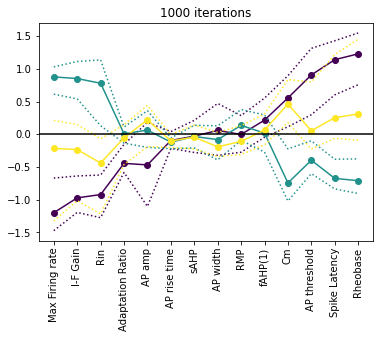

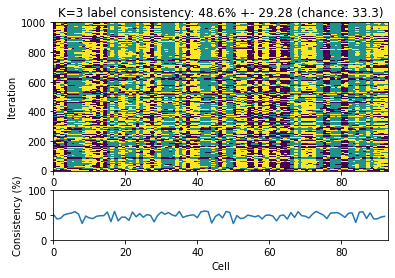

In [53]:
from pandas.compat.numpy import np_array_datetime64_compat
###########   Cluster Validation #############
from random import sample
from tqdm import tqdm
import scipy
''' random sub sample cluster and plot cluster center similarity '''
SubSampleFrac = .8
num_iter = 1000
center_list = []
label_list = []
sub_sample_ind_list = []
full_label_list = []
k = 3


for ni in tqdm( range(num_iter) ):
    sub_sample_ind = []
    for t in uniq_types:
        t_inds = [i for i in range(len(type_list)) if t in type_list[i]]
        # print(t_inds)
        sub_sample_ind.extend( sample(t_inds, int(len(t_inds)*SubSampleFrac) ) )
    kmeans_iter = KMeans(n_clusters=k, random_state=42).fit(data_for_fit[sub_sample_ind][:,new_cent_order])
    centers_iter = kmeans_iter.cluster_centers_.T
    centers_iter = centers_iter - np.mean(centers_iter,axis=0)
    labels_iter = kmeans_iter.labels_

    if ni>0:
        corco = np.corrcoef(centers_iter.T,center_list[0].T)
        corco = corco[0:k,k:]
        ind = np.argmax(corco,axis=0) 
        centers_iter = centers_iter[:,ind]
        labels_iter = [ind[l] for l in labels_iter]
    
    full_label_iter = np.empty((data_for_fit.shape[0],))
    full_label_iter[:] = np.nan
    full_label_iter[sub_sample_ind] = labels_iter

    center_list.append(centers_iter)
    label_list.append(labels_iter)
    sub_sample_ind_list.append(sub_sample_ind_list)
    full_label_list.append(full_label_iter)
    
    # delta_centers_iter = abs( np.diff(centers_iter,axis=1))
   
center_stack = np.stack(center_list)
mean_center = np.mean(center_stack,0)
nintey_p_center = np.percentile(center_stack, [2.5, 97.5], axis=0)

cmap = plt.cm.viridis(np.linspace(0,1,k))
fig, ax = plt.subplots(1)
for ki in range(k):
    ax.plot(mean_center[:,ki].T,'-o',color=cmap[ki])
    ax.plot(nintey_p_center[0,:,ki].T,':',color=cmap[ki])
    ax.plot(nintey_p_center[1,:,ki].T,':',color=cmap[ki])


ax.set_xticks(np.arange(len(numericals)))
ax.set_xticklabels(sorted_numericals,rotation=90)
ax.axhline(0, color='k')



full_label_stack = np.stack(full_label_list)

pseudo_truth = scipy.stats.mode(full_label_stack,axis=0)[0]
is_match = full_label_stack == pseudo_truth
consistency_iter = np.mean(is_match, axis = 1)
mean_consistency = np.mean(consistency_iter)
std_consistency = np.std(consistency_iter)
consistency_report = 'label consistency: ' + str(round(mean_consistency*100,1)) + '% +- ' + str(round(std_consistency*100,2)) + ' (chance: ' + str(round(1/k*100,1))+')'
# print(consistency_report)
# print('(chance: ' + str(round(1/k*100,1))+')')
ax.title.set_text( str(ni+1) +' iterations' )
plt.show()
fig.savefig('CrossVal_Data k=3 Centers.'+fig_opt['format'],**fig_opt)


fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]}  )
ax[0].pcolor( full_label_stack )
ax[0].set_xlabel('Cell')
ax[0].set_ylabel('Iteration')
ax[0].title.set_text('K='+str(k) +' '+ consistency_report)
ax[1].plot(np.mean(is_match,axis=0)*100)
ax[1].set_ylabel('Consistency (%)')
ax[1].set_ylim((0,100))
ax[1].set_xlim((0,is_match.shape[1]))
ax[1].set_xlabel('Cell')
fig.savefig('CrossVal_Data k=3 Labeling.'+fig_opt['format'],**fig_opt)

In [54]:

import os
from google import colab
for root, dirs, files in os.walk("/content"):
    for f in files:
        if 'sample_data' in root: continue
        if f.endswith(".png"):
             colab.files.download(os.path.join(root, f))
        if f.endswith(".csv"):
             colab.files.download(os.path.join(root, f))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>